         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        1

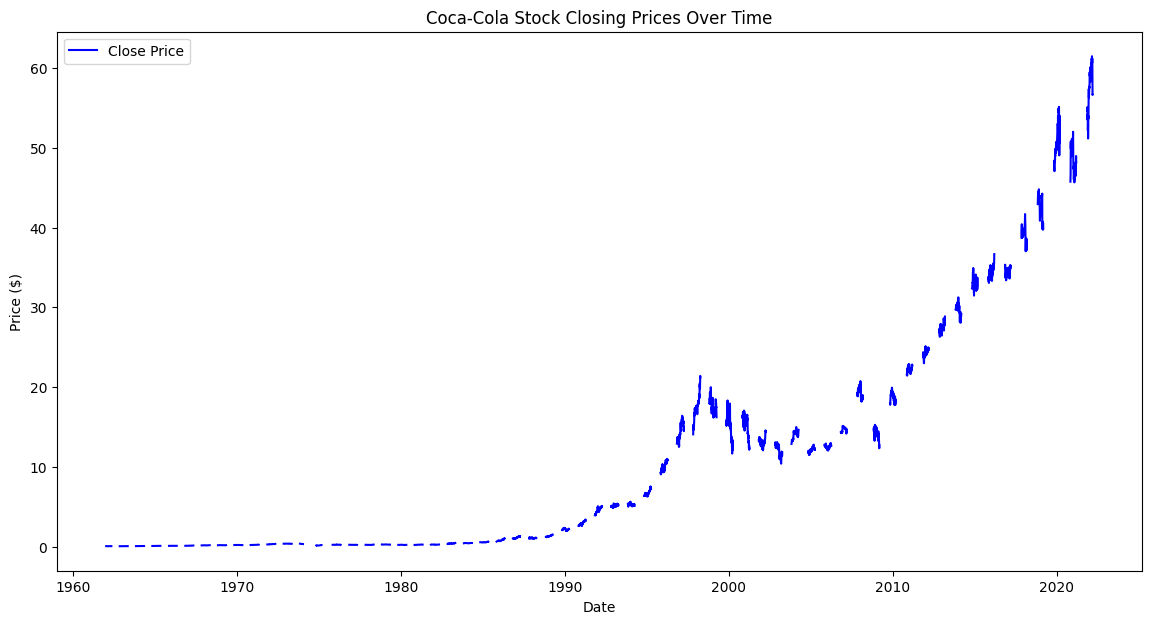

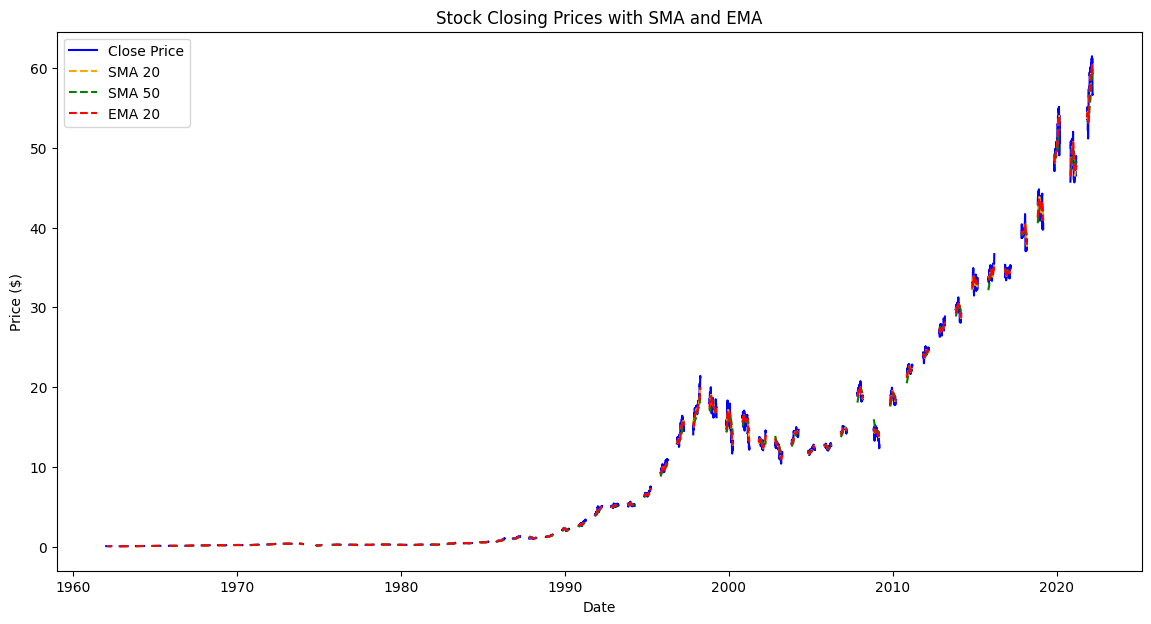

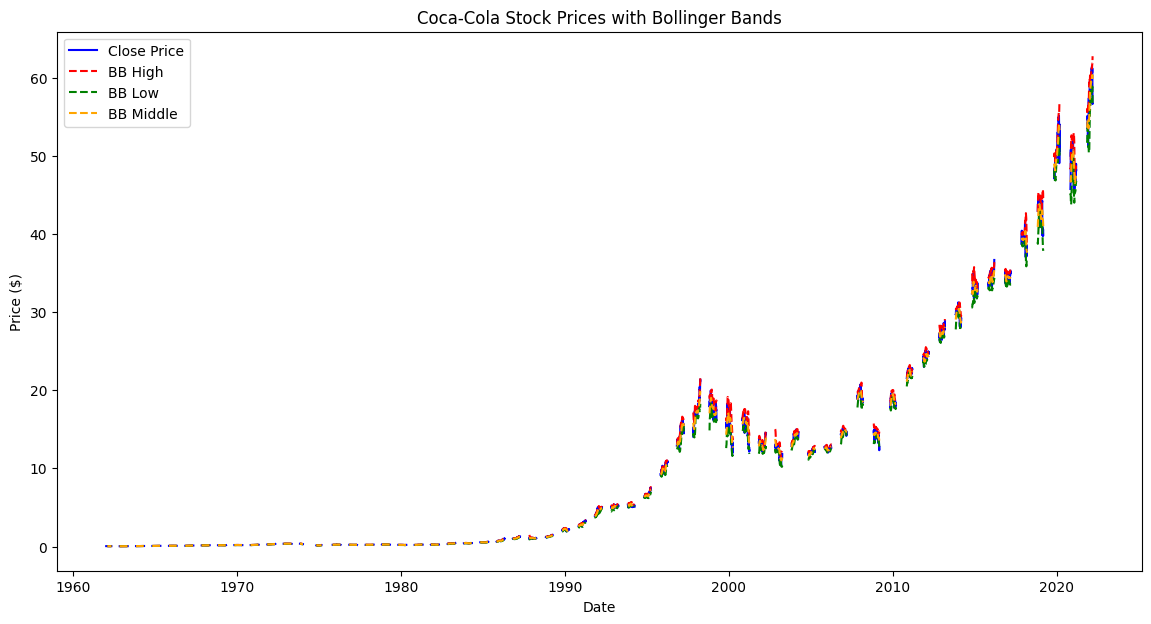

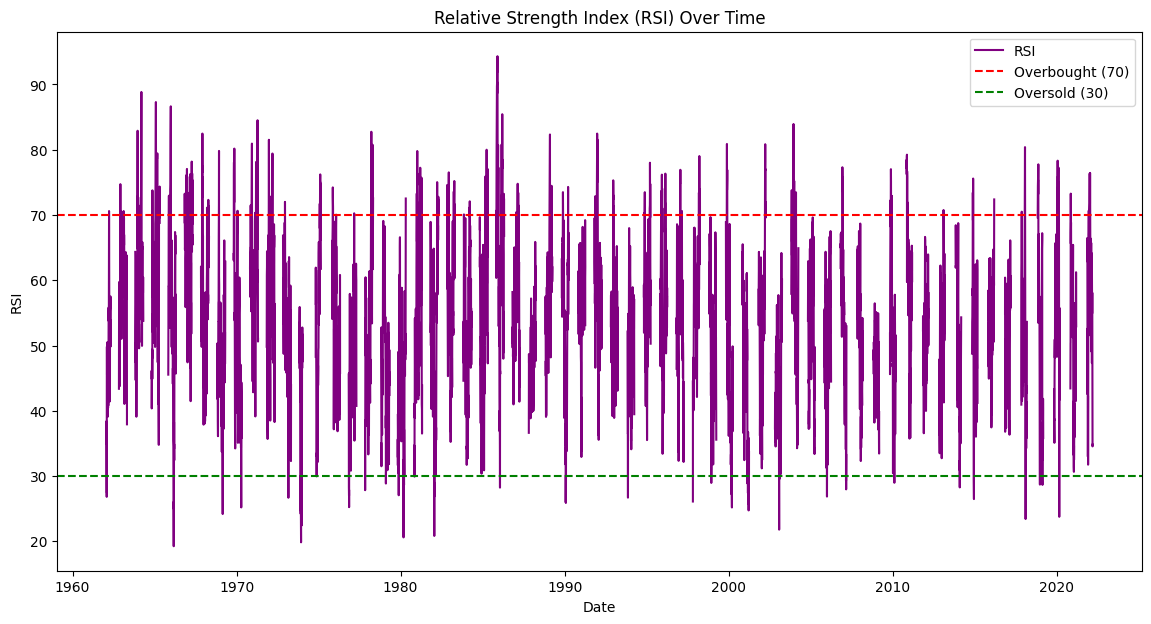

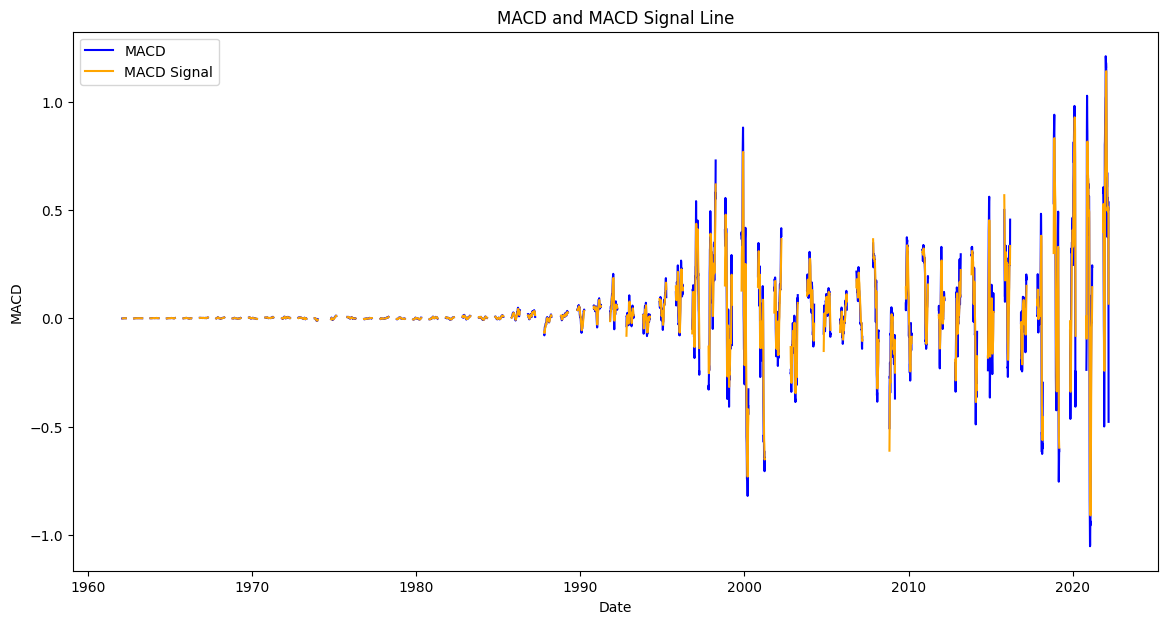

Shape of df_clean after cleaning: (15262, 16)
Checking for NaNs in df_clean:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
SMA_20          0
SMA_50          0
EMA_20          0
BB_High         0
BB_Low          0
BB_Middle       0
RSI             0
MACD            0
MACD_Signal     0
dtype: int64
Features (X) shape: (15262, 13)
Target (y) shape: (15262,)
Training set size: 12209
Test set size: 3053
Mean Squared Error: 0.006553158905207518


In [184]:
import pandas as pd
import ta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Replace 'path_to_csv' with the actual path to the downloaded CSV file
file_path = 'Coca-Cola_stock_history.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check the summary of the dataset
print(df.info())

# Get the statistical summary of the numerical columns
print(df.describe())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')

# Check if any dates could not be parsed
print("Dates that could not be parsed:", df['Date'].isna().sum())

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Coca-Cola Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Adding Simple Moving Average for 20 and 50 days
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Adding Exponential Moving Average for 20 days
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)

# Plot Closing Price with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='SMA 20', linestyle='--', color='orange')
plt.plot(df['SMA_50'], label='SMA 50', linestyle='--', color='green')
plt.plot(df['EMA_20'], label='EMA 20', linestyle='--', color='red')
plt.title('Stock Closing Prices with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Create Bollinger Bands
bb = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_High'] = bb.bollinger_hband()
df['BB_Low'] = bb.bollinger_lband()
df['BB_Middle'] = bb.bollinger_mavg()

# Plotting Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['BB_High'], label='BB High', linestyle='--', color='red')
plt.plot(df['BB_Low'], label='BB Low', linestyle='--', color='green')
plt.plot(df['BB_Middle'], label='BB Middle', linestyle='--', color='orange')
plt.title('Coca-Cola Stock Prices with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Adding RSI to DataFrame
df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()

# Plot Relative Strength Index (RSI)
plt.figure(figsize=(14, 7))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Adding MACD and MACD Signal Line to DataFrame
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Plot MACD and MACD Signal Line
plt.figure(figsize=(14, 7))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='orange')
plt.title('MACD and MACD Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Drop rows with NaNs in critical columns
df_clean = df.dropna(subset=['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'BB_High', 'BB_Low', 'BB_Middle', 'RSI', 'MACD', 'MACD_Signal'])
print("Shape of df_clean after cleaning:", df_clean.shape)
print("Checking for NaNs in df_clean:\n", df_clean.isna().sum())

# Define features and target variable
X = df_clean[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'BB_High', 'BB_Low', 'BB_Middle', 'RSI', 'MACD', 'MACD_Signal']]
y = df_clean['Close']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Check if Data is Non-Empty
if len(X) > 0 and len(y) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f'Training set size: {len(X_train)}')
    print(f'Test set size: {len(X_test)}')
else:
    print("DataFrame X or y is empty. Check data processing steps.")

# Example of fitting a Linear Regression model (if needed)
if len(X_train) > 0 and len(X_test) > 0:
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
